# **Import Library**

In [1]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras
import seaborn as sns
from tensorflow.keras.optimizers import Adamax

# **Import Dataset**

We will take a sample of the data to reduce the training time

In [3]:
import pandas as pd

# Tentukan path/file CSV yang ingin dibaca
file_path = 'new_data.csv'

# Baca data dari file CSV
data = pd.read_csv(file_path)

# Hapus variabel (kolom) yang tidak diperlukan
#kolom_hapus = ['slope', 'ca', 'thal']
#data = data.drop(kolom_hapus, axis=1)

# Tampilkan data setelah menghapus variabel
print(data)

              BMI  Smoking  PhysicalHealth  MentalHealth  Sex  AgeCategory  \
0       23.400000        1               0             0    1            3   
1       21.790000        0              14             0    1            1   
2       29.760000        0               0            14    1            0   
3       23.750000        0               0             0    1            2   
4       32.500000        0               0             0    1            2   
...           ...      ...             ...           ...  ...          ...   
479128  32.915874        0               0             0    0            3   
479129  24.331439        1               0             3    0            2   
479130  22.710000        0               0             0    0            2   
479131  17.910762        0               0            10    0            3   
479132  27.925423        0              30             2    0            2   

        Diabetic  GenHealth  SleepTime  HeartDisease  
0       

In [5]:
print(data.columns)

Index(['BMI', 'Smoking', 'PhysicalHealth', 'MentalHealth', 'Sex',
       'AgeCategory', 'Diabetic', 'GenHealth', 'SleepTime', 'HeartDisease'],
      dtype='object')


In [6]:
# print the shape of the DataFrame, so we can see how many examples we have
print ('format(data.shape')
print (data.loc[300000])

format(data.shape
BMI               36.796391
Smoking            1.000000
PhysicalHealth     3.000000
MentalHealth       0.000000
Sex                1.000000
AgeCategory        2.000000
Diabetic           2.000000
GenHealth          2.000000
SleepTime          5.000000
HeartDisease       1.000000
Name: 300000, dtype: float64


In [4]:
# print the last twenty or so data points
data = data[250000:350000]
data

,BMI,Smoking,PhysicalHealth,MentalHealth,Sex,AgeCategory,Diabetic,GenHealth,SleepTime,HeartDisease
250000,23.570000,0,0,0,0,2,0,4,7,0
250001,33.470000,0,0,0,1,3,0,4,7,0
250002,26.580000,0,0,0,1,2,0,4,6,0
250003,22.350000,1,0,0,1,3,0,0,6,0
250004,26.710000,1,0,0,1,2,2,1,7,0
...,...,...,...,...,...,...,...,...,...,...
349995,35.491481,0,0,14,0,3,2,2,7,1
349996,20.904371,1,0,0,1,3,0,2,7,1
349997,32.802474,1,0,20,0,3,0,1,5,1
349998,23.073137,1,0,0,0,3,0,2,7,1


In [8]:
# print data characteristics, usings pandas built-in describe() function
data.describe()

,BMI,Smoking,PhysicalHealth,MentalHealth,Sex,AgeCategory,Diabetic,GenHealth,SleepTime,HeartDisease
count,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000
mean,27.810530,0.41987,4.280870,3.24110,0.451700,2.32359,0.339850,2.254510,6.17254,0.838150
std,5.761861,0.49354,9.013795,7.50167,0.497664,0.74967,0.742117,1.468529,1.38490,0.368315
min,12.160000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000
25%,23.862419,0.00000,0.000000,0.00000,0.000000,2.00000,0.000000,1.000000,5.00000,1.000000
50%,26.986936,0.00000,0.000000,0.00000,0.000000,2.00000,0.000000,2.000000,6.00000,1.000000
75%,30.735995,1.00000,3.000000,2.00000,1.000000,3.00000,0.000000,4.000000,7.00000,1.000000
max,79.410000,1.00000,30.000000,30.00000,1.000000,3.00000,3.000000,4.000000,23.00000,1.000000


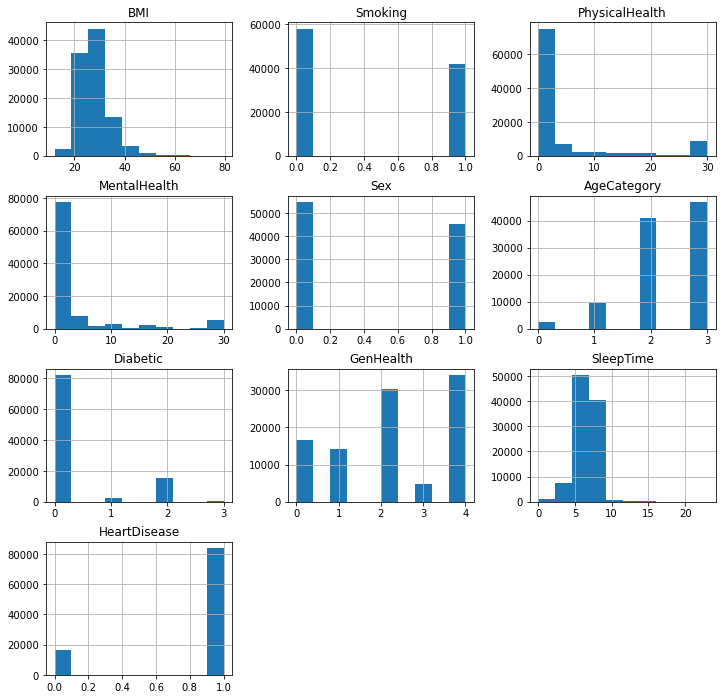

In [9]:
# plot histograms for each variable
data.hist(figsize = (12, 12))
plt.show()

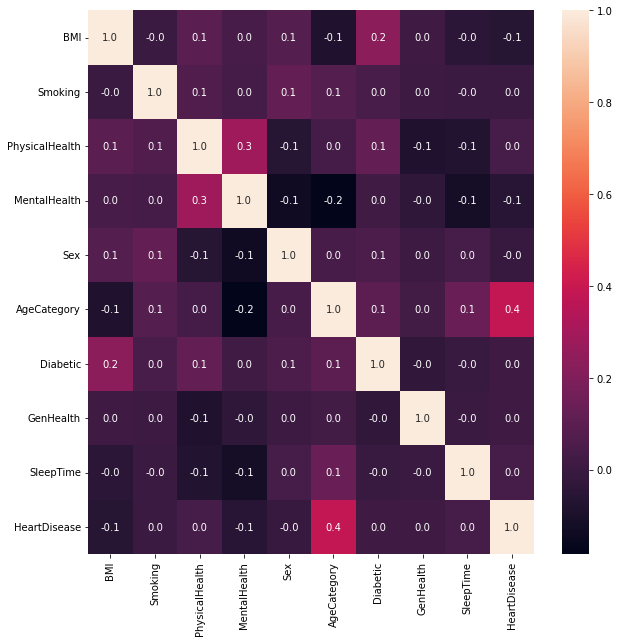

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

# **Training and Testing Datasets**


In [5]:
# create X and Y datasets for training
from sklearn import model_selection

X = np.array(data.drop(['HeartDisease'], 1))
y = np.array(data['HeartDisease'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

C:\Users\audig\AppData\Local\Temp\ipykernel_15480\2895974010.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop(['HeartDisease'], 1))


In [6]:
# convert the data to categorical labels
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:20])

(80000, 2)
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


# **Building and Training the Neural Network**

Now that we have our data fully processed and split into training and testing datasets, we can begin building a neural network to solve this classification problem. 

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

# Set the random seed value
seed_value = 42

# Set the seed for Python random module
import random
random.seed(seed_value)

# Set the seed for NumPy
import numpy as np
np.random.seed(seed_value)

# Set the seed for TensorFlow
tf.random.set_seed(seed_value)
# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=9, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(2, activation='softmax'))

     # compile model
    rmsprop = RMSprop(learning_rate=0.0001)
    model.compile(loss='binary_crossentropy', optimizer=rmsprop, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                160       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 8)                 0         
                                                                 
 dense_11 (Dense)            (None, 2)                 18        
                                                                 
Total params: 314
Trainable params: 314
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
# fit the model to the training data
model.fit(X_train, Y_train, epochs=60, batch_size=10, verbose = 1)

Epoch 1/60
8000/8000 [==============================] - 30s 4ms/step - loss: 0.4357 - accuracy: 0.8365
Epoch 2/60
8000/8000 [==============================] - 29s 4ms/step - loss: 0.3928 - accuracy: 0.8448
Epoch 3/60
8000/8000 [==============================] - 32s 4ms/step - loss: 0.3810 - accuracy: 0.8554
Epoch 4/60
8000/8000 [==============================] - 26s 3ms/step - loss: 0.3771 - accuracy: 0.8571
Epoch 5/60
8000/8000 [==============================] - 27s 3ms/step - loss: 0.3761 - accuracy: 0.8585
Epoch 6/60
8000/8000 [==============================] - 30s 4ms/step - loss: 0.3754 - accuracy: 0.8579
Epoch 7/60
8000/8000 [==============================] - 42s 5ms/step - loss: 0.3752 - accuracy: 0.8584
Epoch 8/60
8000/8000 [==============================] - 49s 6ms/step - loss: 0.3749 - accuracy: 0.8580
Epoch 9/60
8000/8000 [==============================] - 33s 4ms/step - loss: 0.3747 - accuracy: 0.8585
Epoch 10/60
8000/8000 [==============================] - 30s 4ms/step - l

In [12]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

625/625 [==============================] - 5s 6ms/step
Results for Categorical Model
0.86275
              precision    recall  f1-score   support

           0       0.77      0.17      0.28      3122
           1       0.87      0.99      0.92     16878

    accuracy                           0.86     20000
   macro avg       0.82      0.58      0.60     20000
weighted avg       0.85      0.86      0.82     20000



In [19]:
# Saving model
model.save("Build_model.h5")

# **Try Binary Classification**

Try other possibilities to get the model with the best accuracy. we will use binary because the data used has two classes

In [7]:
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print (Y_train_binary[:20])

[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0]


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import RMSprop

# Set the random seed value
seed_value = 42

# Set the seed for Python random module
import random
random.seed(seed_value)

# Set the seed for NumPy
import numpy as np
np.random.seed(seed_value)

# Set the seed for TensorFlow
tf.random.set_seed(seed_value)
# define a function to build the keras model
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=9, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(1, activation='sigmoid'))

    # compile model
    rmsprop = RMSprop(learning_rate=0.0001)
    model.compile(loss='binary_crossentropy', optimizer=rmsprop, metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                160       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 8)                 0         
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
# fit the binary model on the training data
binary_model.fit(X_train, Y_train_binary, epochs=60, batch_size=10, verbose = 1)

Epoch 1/60
8000/8000 [==============================] - 47s 6ms/step - loss: 0.4299 - accuracy: 0.8372
Epoch 2/60
8000/8000 [==============================] - 48s 6ms/step - loss: 0.3865 - accuracy: 0.8497
Epoch 3/60
8000/8000 [==============================] - 43s 5ms/step - loss: 0.3754 - accuracy: 0.8573
Epoch 4/60
8000/8000 [==============================] - 42s 5ms/step - loss: 0.3732 - accuracy: 0.8584
Epoch 5/60
8000/8000 [==============================] - 45s 6ms/step - loss: 0.3728 - accuracy: 0.8593
Epoch 6/60
8000/8000 [==============================] - 37s 5ms/step - loss: 0.3726 - accuracy: 0.8590
Epoch 7/60
8000/8000 [==============================] - 49s 6ms/step - loss: 0.3722 - accuracy: 0.8597
Epoch 8/60
8000/8000 [==============================] - 41s 5ms/step - loss: 0.3722 - accuracy: 0.8599
Epoch 9/60
8000/8000 [==============================] - 59s 7ms/step - loss: 0.3721 - accuracy: 0.8595
Epoch 10/60
8000/8000 [==============================] - 49s 6ms/step - l

In [16]:
# generate classification report using predictions for binary model
from sklearn.metrics import classification_report, accuracy_score
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

625/625 [==============================] - 2s 3ms/step
Results for Binary Model
0.8613
              precision    recall  f1-score   support

           0       0.69      0.23      0.35      3186
           1       0.87      0.98      0.92     16814

    accuracy                           0.86     20000
   macro avg       0.78      0.61      0.64     20000
weighted avg       0.84      0.86      0.83     20000

